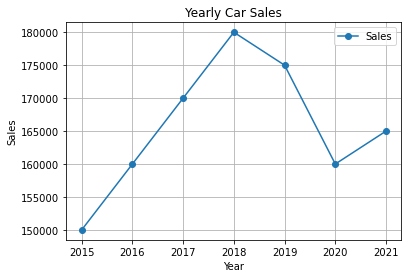

In [153]:
import pandas as pd
import matplotlib.pyplot as plt

# 假设已经有一个包含汽车销售数据的DataFrame df
# 其中包含以下列: 'Year', 'Sales'

# 示例数据
data = {
    'Year': [2015, 2016, 2017, 2018, 2019, 2020, 2021],
    'Sales': [150000, 160000, 170000, 180000, 175000, 160000, 165000]
}

df = pd.DataFrame(data)

# 使用 pandas 的功能绘制折线图，显示汽车销量每年的波动情况。
df.plot(x='Year', y='Sales', kind='line', marker='o', linestyle='-', title='Yearly Car Sales')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


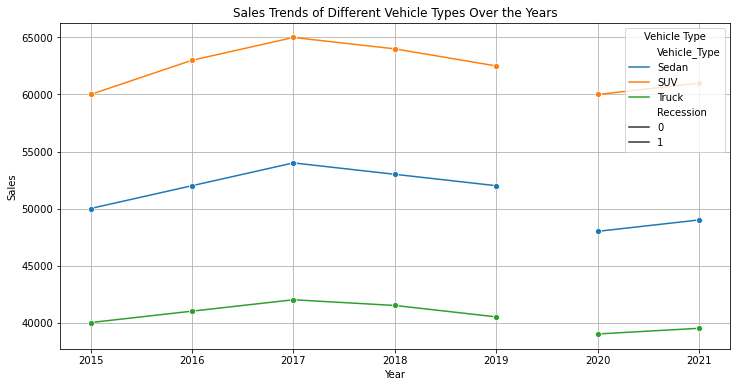

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 示例数据
data = {
    'Year': [2015, 2015, 2015, 2016, 2016, 2016, 2017, 2017, 2017, 2018, 2018, 2018, 2019, 2019, 2019, 2020, 2020, 2020, 2021, 2021, 2021],
    'Vehicle_Type': ['Sedan', 'SUV', 'Truck', 'Sedan', 'SUV', 'Truck', 'Sedan', 'SUV', 'Truck', 'Sedan', 'SUV', 'Truck', 'Sedan', 'SUV', 'Truck', 'Sedan', 'SUV', 'Truck', 'Sedan', 'SUV', 'Truck'],
    'Sales': [50000, 60000, 40000, 52000, 63000, 41000, 54000, 65000, 42000, 53000, 64000, 41500, 52000, 62500, 40500, 48000, 60000, 39000, 49000, 61000, 39500],
    'Recession': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1]
}

df = pd.DataFrame(data)

# 设置绘图样式
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Year', y='Sales', hue='Vehicle_Type', marker='o', style='Recession', dashes=False)
plt.title('Sales Trends of Different Vehicle Types Over the Years')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.legend(title='Vehicle Type')
plt.show()




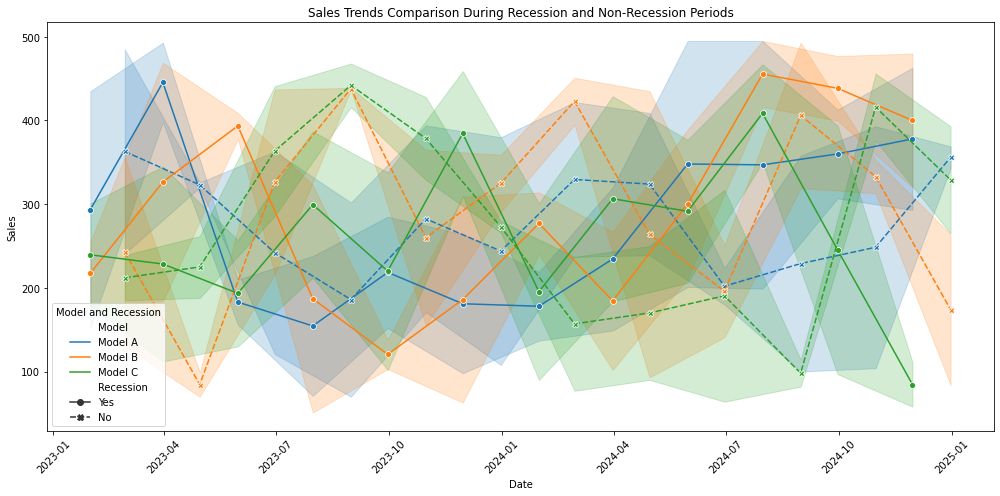

In [155]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置随机种子以便结果可重复
np.random.seed(42)

# 创建示例数据
date_range = pd.date_range(start='2023-01-01', end='2024-12-31', freq='M')
models = ['Model A', 'Model B', 'Model C']
recession_periods = ['Yes', 'No']

# 随机生成数据
data = {
    'Date': np.tile(date_range, len(models) * len(recession_periods)),
    'Model': np.repeat(models, len(date_range) * len(recession_periods)),
    'Recession': np.tile(recession_periods, len(date_range) * len(models)),
    'Sales': np.random.randint(50, 500, size=len(date_range) * len(models) * len(recession_periods))
}

df = pd.DataFrame(data)

# 确保日期列是 datetime 类型
df['Date'] = pd.to_datetime(df['Date'])

# 绘制销售趋势图
plt.figure(figsize=(14, 7))
sns.lineplot(data=df, x='Date', y='Sales', hue='Model', style='Recession', markers=True)
plt.title('Sales Trends Comparison During Recession and Non-Recession Periods')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend(title='Model and Recession')
plt.xticks(rotation=45)
plt.tight_layout()

# 显示图表
plt.show()


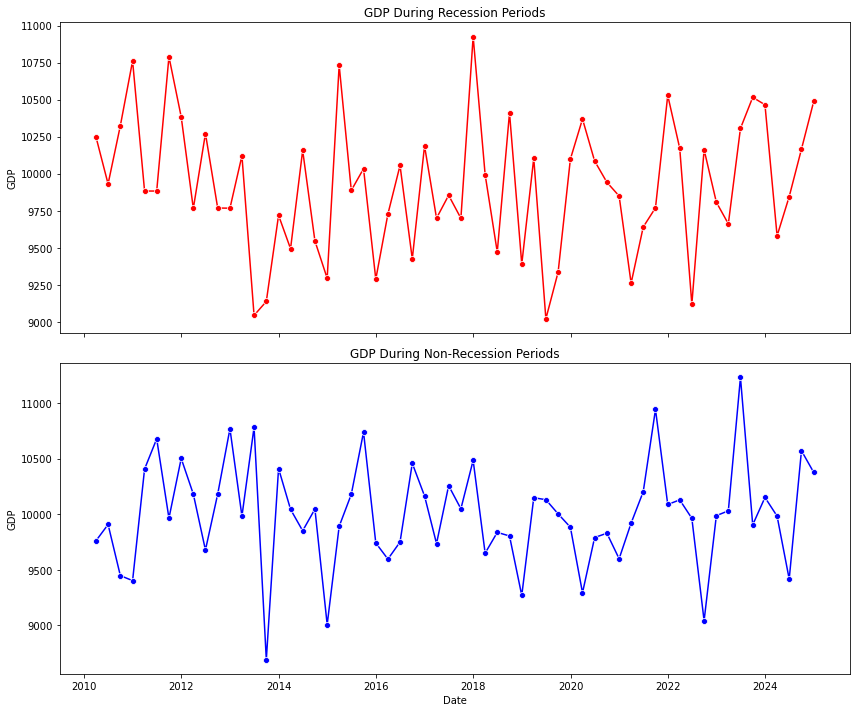

In [156]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置随机种子以便结果可重复
np.random.seed(42)

# 创建示例数据
date_range = pd.date_range(start='2010-01-01', end='2024-12-31', freq='Q')  # 按季度生成数据
periods = ['Recession', 'Non-Recession']

# 随机生成数据
data = {
    'Date': np.tile(date_range, len(periods)),
    'Period': np.repeat(periods, len(date_range)),
    'GDP': np.random.normal(loc=10000, scale=500, size=len(date_range) * len(periods))  # 假设的GDP数据
}

df = pd.DataFrame(data)

# 确保日期列是 datetime 类型
df['Date'] = pd.to_datetime(df['Date'])

# 绘制副图
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 10), sharex=True)

# 绘制衰退期GDP
sns.lineplot(data=df[df['Period'] == 'Recession'], x='Date', y='GDP', ax=axes[0], color='red', marker='o')
axes[0].set_title('GDP During Recession Periods')
axes[0].set_ylabel('GDP')

# 绘制非衰退期GDP
sns.lineplot(data=df[df['Period'] == 'Non-Recession'], x='Date', y='GDP', ax=axes[1], color='blue', marker='o')
axes[1].set_title('GDP During Non-Recession Periods')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('GDP')

# 图表调整
plt.tight_layout()

# 显示图表
plt.show()


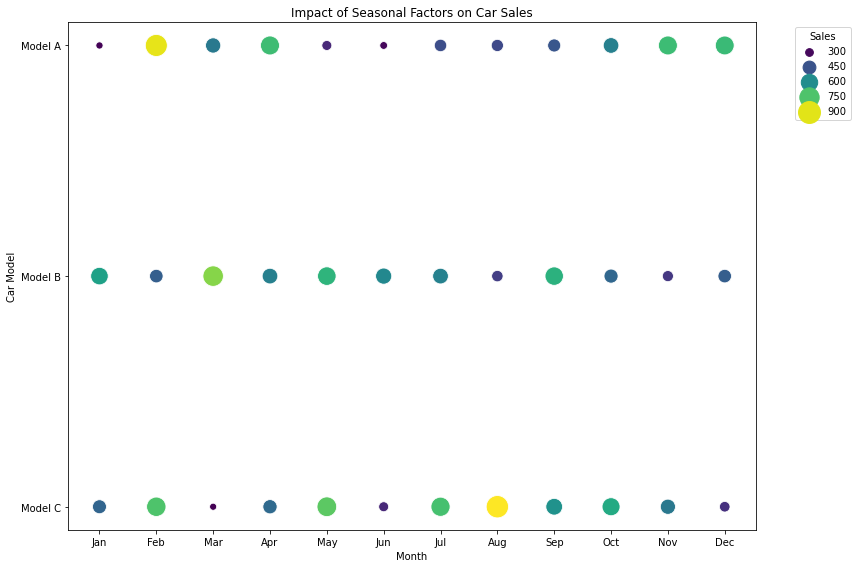

In [157]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置随机种子以便结果可重复
np.random.seed(42)

# 创建示例数据
date_range = pd.date_range(start='2023-01-01', end='2024-12-31', freq='M')
models = ['Model A', 'Model B', 'Model C']

# 随机生成数据
data = {
    'Date': np.tile(date_range, len(models)),
    'Model': np.repeat(models, len(date_range)),
    'Sales': np.random.randint(50, 500, size=len(date_range) * len(models)),
}

df = pd.DataFrame(data)

# 提取月份以展示季节性因素
df['Month'] = df['Date'].dt.month

# 计算每个车型每月的总销售量
monthly_sales = df.groupby(['Model', 'Month']).agg({'Sales': 'sum'}).reset_index()

# 计算每个月的销售量总和，以便设置气泡大小
monthly_sales_sum = monthly_sales.groupby('Month')['Sales'].sum().reset_index()
monthly_sales_sum.rename(columns={'Sales': 'Total_Sales'}, inplace=True)
monthly_sales = monthly_sales.merge(monthly_sales_sum, on='Month')

# 绘制气泡图
plt.figure(figsize=(12, 8))
sns.scatterplot(data=monthly_sales, x='Month', y='Model', size='Sales', hue='Sales', palette='viridis', sizes=(50, 500))
plt.title('Impact of Seasonal Factors on Car Sales')
plt.xlabel('Month')
plt.ylabel('Car Model')
plt.legend(title='Sales', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(ticks=np.arange(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()

# 显示图表
plt.show()


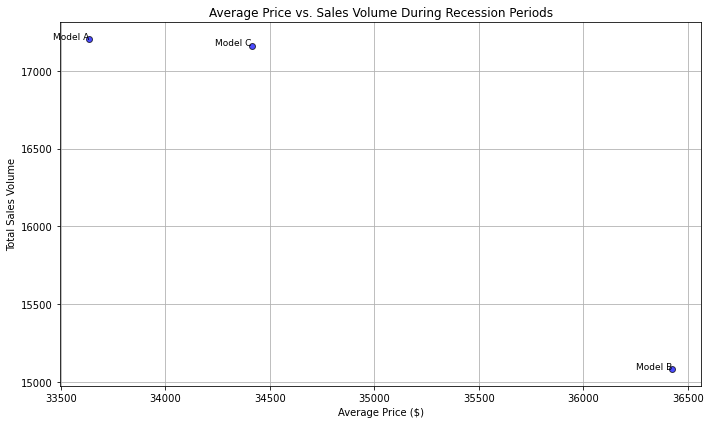

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以便结果可重复
np.random.seed(42)

# 创建示例数据
date_range = pd.date_range(start='2020-01-01', end='2024-12-31', freq='M')
models = ['Model A', 'Model B', 'Model C']
recession_periods = ['Yes', 'No']

# 随机生成数据
data = {
    'Date': np.tile(date_range, len(models) * len(recession_periods)),
    'Model': np.repeat(models, len(date_range) * len(recession_periods)),
    'Recession': np.tile(recession_periods, len(date_range) * len(models)),
    'Sales': np.random.randint(50, 500, size=len(date_range) * len(models) * len(recession_periods)),
    'Price': np.random.uniform(20000, 50000, size=len(date_range) * len(models) * len(recession_periods))  # 假设的价格数据
}

df = pd.DataFrame(data)

# 过滤经济衰退期间的数据
recession_data = df[df['Recession'] == 'Yes']

# 计算每种车型的平均价格和总销售量
avg_price_sales = recession_data.groupby('Model').agg({'Price': 'mean', 'Sales': 'sum'}).reset_index()

# 绘制散点图
plt.figure(figsize=(10, 6))
plt.scatter(avg_price_sales['Price'], avg_price_sales['Sales'], color='blue', edgecolor='k', alpha=0.7)
plt.title('Average Price vs. Sales Volume During Recession Periods')
plt.xlabel('Average Price ($)')
plt.ylabel('Total Sales Volume')
plt.grid(True)

# 添加标签到每个点
for i, row in avg_price_sales.iterrows():
    plt.text(row['Price'], row['Sales'], row['Model'], fontsize=9, ha='right')

plt.tight_layout()

# 显示图表
plt.show()



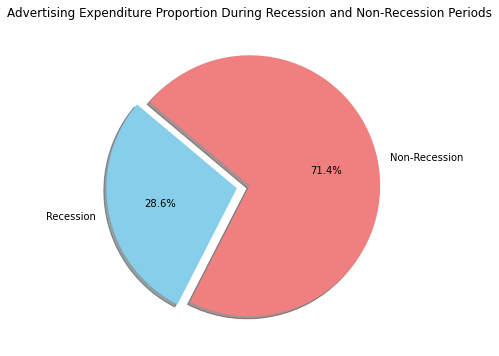

In [159]:
import matplotlib.pyplot as plt

# 示例数据：广告支出（单位：万元）
data = {
    'Recession': 120,  # 衰退期广告支出
    'Non-Recession': 300  # 非衰退期广告支出
}

# 准备数据
labels = data.keys()
sizes = data.values()
colors = ['skyblue', 'lightcoral']
explode = (0.1, 0)  # 突出显示衰退期的部分

# 绘制饼图
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Advertising Expenditure Proportion During Recession and Non-Recession Periods')

# 显示图表
plt.show()





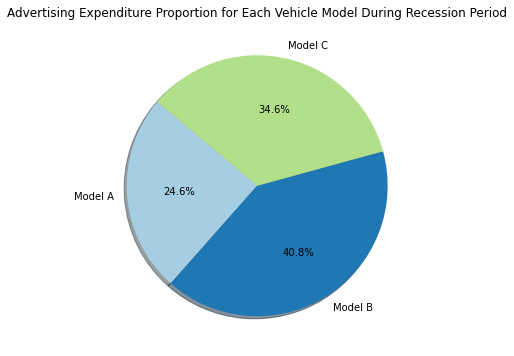

In [160]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以便结果可重复
np.random.seed(42)

# 创建示例数据
models = ['Model A', 'Model B', 'Model C']
advertising_expenditure = np.random.uniform(50000, 150000, size=len(models))  # 随机生成广告支出数据

# 示例数据：衰退期各类车辆的广告支出总额
data = {
    'Model': models,
    'Advertising Expenditure': advertising_expenditure
}

df = pd.DataFrame(data)

# 绘制饼状图
plt.figure(figsize=(8, 6))
plt.pie(df['Advertising Expenditure'], labels=df['Model'], autopct='%1.1f%%', colors=plt.cm.Paired(np.arange(len(models))), shadow=True, startangle=140)
plt.title('Advertising Expenditure Proportion for Each Vehicle Model During Recession Period')

# 显示图表
plt.show()



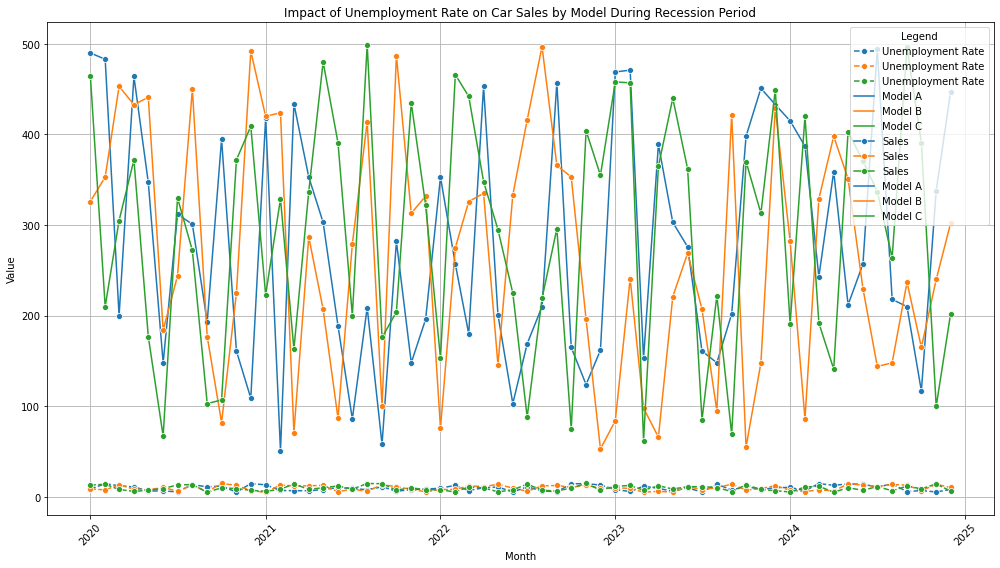

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 设置随机种子以便结果可重复
np.random.seed(42)

# 创建示例数据
date_range = pd.date_range(start='2020-01-01', end='2024-12-31', freq='M')
models = ['Model A', 'Model B', 'Model C']

# 随机生成数据
data = {
    'Date': np.tile(date_range, len(models)),
    'Model': np.repeat(models, len(date_range)),
    'Unemployment Rate': np.random.uniform(5, 15, size=len(date_range) * len(models)),
    'Sales': np.random.randint(50, 500, size=len(date_range) * len(models)),
    'Recession': 'Yes'
}

df = pd.DataFrame(data)

# 计算每月的平均失业率和销售量
df['Month'] = df['Date'].dt.to_period('M').astype('datetime64').dt.to_pydatetime()
monthly_summary = df.groupby(['Month', 'Model']).agg({'Unemployment Rate': 'mean', 'Sales': 'sum'}).reset_index()

# 绘制折线图
plt.figure(figsize=(14, 8))

# 绘制失业率折线图
sns.lineplot(data=monthly_summary, x='Month', y='Unemployment Rate', hue='Model', marker='o', linestyle='--', label='Unemployment Rate')

# 绘制销量折线图
sns.lineplot(data=monthly_summary, x='Month', y='Sales', hue='Model', marker='o', linestyle='-', label='Sales')

plt.title('Impact of Unemployment Rate on Car Sales by Model During Recession Period')
plt.xlabel('Month')
plt.ylabel('Value')
plt.legend(title='Legend')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

# 显示图表
plt.show()




In [166]:
pip install dash


In [169]:
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import plotly.express as px
import pandas as pd
import numpy as np

# 初始化 Dash 应用程序
app = dash.Dash(__name__)

# 创建示例数据
np.random.seed(42)
date_range = pd.date_range(start='2020-01-01', end='2024-12-31', freq='M')
models = ['Model A', 'Model B', 'Model C']
data = {
    'Date': np.tile(date_range, len(models)),
    'Model': np.repeat(models, len(date_range)),
    'Unemployment Rate': np.random.uniform(5, 15, size=len(date_range) * len(models)),
    'Sales': np.random.randint(50, 500, size=len(date_range) * len(models)),
    'Recession': 'Yes'
}

df = pd.DataFrame(data)

# 计算经济衰退报告的统计数据
monthly_summary = df.groupby(['Date', 'Model']).agg({'Unemployment Rate': 'mean', 'Sales': 'sum'}).reset_index()

# 创建折线图
def create_recession_plot(model):
    filtered_df = monthly_summary[monthly_summary['Model'] == model]
    fig = px.line(filtered_df, x='Date', y='Unemployment Rate', title=f'Unemployment Rate for {model}')
    return fig

def create_annual_report(model):
    filtered_df = monthly_summary[monthly_summary['Model'] == model]
    filtered_df['Year'] = filtered_df['Date'].dt.year
    annual_summary = filtered_df.groupby('Year').agg({'Sales': 'sum'}).reset_index()
    fig = px.bar(annual_summary, x='Year', y='Sales', title=f'Annual Sales Report for {model}')
    return fig

# 设置应用程序的布局
app.layout = html.Div([
    html.H1('Economic Recession Dashboard'),
    html.Div('Select a car model to view the economic impact during the recession period.'),
    
    dcc.Dropdown(
        id='model-dropdown',
        options=[{'label': model, 'value': model} for model in models],
        value=models[0]  # 默认选中第一个车型
    ),
    
    html.Div(id='recession-output', className='output-container'),
    html.Div(id='annual-output', className='output-container')
])

# 回调函数：根据选择的车型更新图表
@app.callback(
    [Output('recession-output', 'children'),
     Output('annual-output', 'children')],
    [Input('model-dropdown', 'value')]
)
def update_graphs(selected_model):
    recession_fig = create_recession_plot(selected_model)
    annual_fig = create_annual_report(selected_model)
    
    return [
        dcc.Graph(figure=recession_fig),
        dcc.Graph(figure=annual_fig)
    ]

# 运行应用程序
if __name__ == '__main__':
    app.run_server(debug=True)


C:\Users\steve\AppData\Local\Temp\ipykernel_21596\2133316853.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\steve\AppData\Local\Temp\ipykernel_21596\2133316853.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\steve\AppData\Local\Temp\ipykernel_21596\2133316853.py:37: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa